In [108]:
import pandas as pd

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# 各データの記述統計量を生成
descriptive_stats = data.describe()

# 結果を表示
print(descriptive_stats)


              AAPL         MSFT        GOOGL
count  8364.000000  7983.000000  3333.000000
mean     22.281018    18.984698   389.855821
std      37.764469    16.424012   235.102374
min       0.230510     0.067200    50.005000
25%       1.137100     2.113300   228.510000
50%       1.628250    20.469000   295.610000
75%      23.694500    25.483500   549.490000
max     175.610000    84.560000  1058.290000


In [109]:
import pandas as pd

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# 各データの開始日と終了日を表示
aapl_start, aapl_end = data_aapl.index.min(), data_aapl.index.max()
msft_start, msft_end = data_msft.index.min(), data_msft.index.max()
googl_start, googl_end = data_googl.index.min(), data_googl.index.max()

print(f"AAPL data range: {aapl_start} to {aapl_end}")
print(f"MSFT data range: {msft_start} to {msft_end}")
print(f"GOOGL data range: {googl_start} to {googl_end}")

# 共通の日付範囲を計算
common_start = max(aapl_start, msft_start, googl_start)
common_end = min(aapl_end, msft_end, googl_end)

print(f"Common data range: {common_start} to {common_end}")


AAPL data range: 1984-09-07 00:00:00 to 2017-11-10 00:00:00
MSFT data range: 1986-03-13 00:00:00 to 2017-11-10 00:00:00
GOOGL data range: 2004-08-19 00:00:00 to 2017-11-10 00:00:00
Common data range: 2004-08-19 00:00:00 to 2017-11-10 00:00:00


In [110]:
import plotly.graph_objs as go

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# 共通の日付範囲を設定
common_start_date = '2004-08-19'

# データを共通の日付範囲でフィルタリング
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# 折れ線グラフの作成
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['AAPL'], mode='lines', name='AAPL'))
fig.add_trace(go.Scatter(x=data.index, y=data['MSFT'], mode='lines', name='MSFT'))
fig.add_trace(go.Scatter(x=data.index, y=data['GOOGL'], mode='lines', name='GOOGL'))

fig.update_layout(title='Stock Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  template='plotly')

fig.show()


In [6]:
import pandas as pd
import plotly.express as px

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# 共通の日付範囲を設定
common_start_date = '2004-08-19'

# データを共通の日付範囲でフィルタリング
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# 相関行列の計算
correlation_matrix = data.corr()

# 小数点第2位まで表示
correlation_matrix = correlation_matrix.round(2)

# ヒートマップの作成
fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale='Blues',  # カラースケールを変更
                title='Correlation Matrix of Stock Prices')

fig.update_layout(
    xaxis_title="Stocks",
    yaxis_title="Stocks"
)

fig.show()


In [112]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# データを共通の日付範囲でフィルタリング
common_start_date = '2004-08-19'
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]

# データのリストを作成
hist_data = [data_aapl['Close'], data_msft['Close'], data_googl['Close']]
group_labels = ['AAPL', 'MSFT', 'GOOGL']

# ヒストグラムを作成
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, show_hist=True, show_rug=False)

# レイアウトの更新
fig.update_layout(title_text='Distribution of Stock Prices',
                  xaxis_title='Stock Price',
                  yaxis_title='Density')

# 図を表示
fig.show()


In [113]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# 共通の日付範囲を設定
common_start_date = '2004-08-19'

# データを共通の日付範囲でフィルタリング
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# 各株の正規化リターンを計算
normalized_data = data / data.iloc[0]

# ポートフォリオの価格を計算
portfolio_value = normalized_data.mean(axis=1)

# 折れ線グラフの作成
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=portfolio_value, mode='lines', name='Portfolio'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['AAPL'], mode='lines', name='AAPL'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['MSFT'], mode='lines', name='MSFT'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['GOOGL'], mode='lines', name='GOOGL'))

fig.update_layout(title='Portfolio and Individual Stock Growth Over Time',
                  xaxis_title='Date',
                  yaxis_title='Normalized Price',
                  template='plotly')

fig.show()

# グロースプロットの作成
fig_growth = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('AAPL Growth', 'MSFT Growth', 'GOOGL Growth'))

fig_growth.add_trace(go.Scatter(x=data.index, y=normalized_data['AAPL'], mode='lines', name='AAPL'), row=1, col=1)
fig_growth.add_trace(go.Scatter(x=data.index, y=normalized_data['MSFT'], mode='lines', name='MSFT'), row=2, col=1)
fig_growth.add_trace(go.Scatter(x=data.index, y=normalized_data['GOOGL'], mode='lines', name='GOOGL'), row=3, col=1)

fig_growth.update_layout(title='Individual Stock Growth Over Time',
                         xaxis_title='Date',
                         yaxis_title='Normalized Price',
                         template='plotly',
                         height=800)

fig_growth.show()


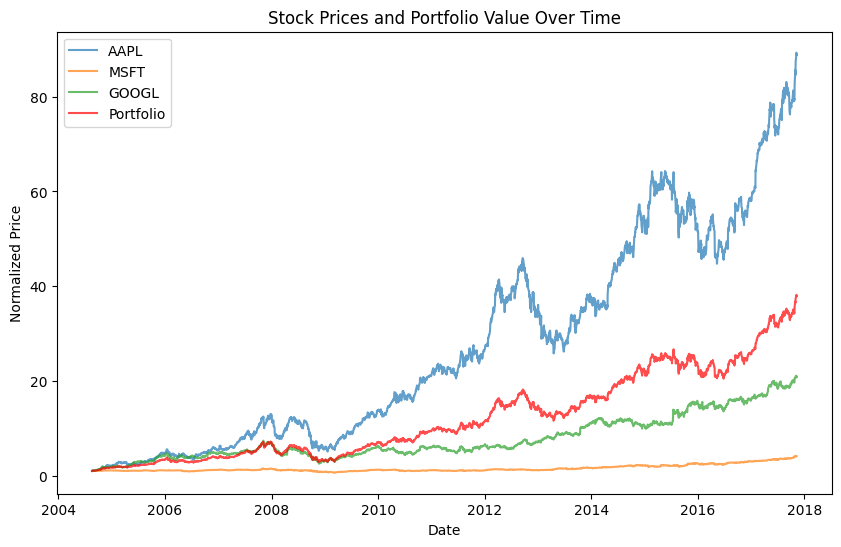

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')

# 共通の日付範囲を設定
common_start_date = '2004-08-19'

# データを共通の日付範囲でフィルタリング
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# 各株の正規化リターンを計算
normalized_data = data / data.iloc[0]

# ポートフォリオの価格を計算
portfolio_value = normalized_data.mean(axis=1)

# 折れ線グラフの作成
plt.figure(figsize=(10, 6))

plt.plot(data.index, normalized_data['AAPL'], label='AAPL', alpha=0.7)
plt.plot(data.index, normalized_data['MSFT'], label='MSFT', alpha=0.7)
plt.plot(data.index, normalized_data['GOOGL'], label='GOOGL', alpha=0.7)
plt.plot(data.index, portfolio_value, label='Portfolio', alpha=0.7, color='red')

plt.title('Stock Prices and Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


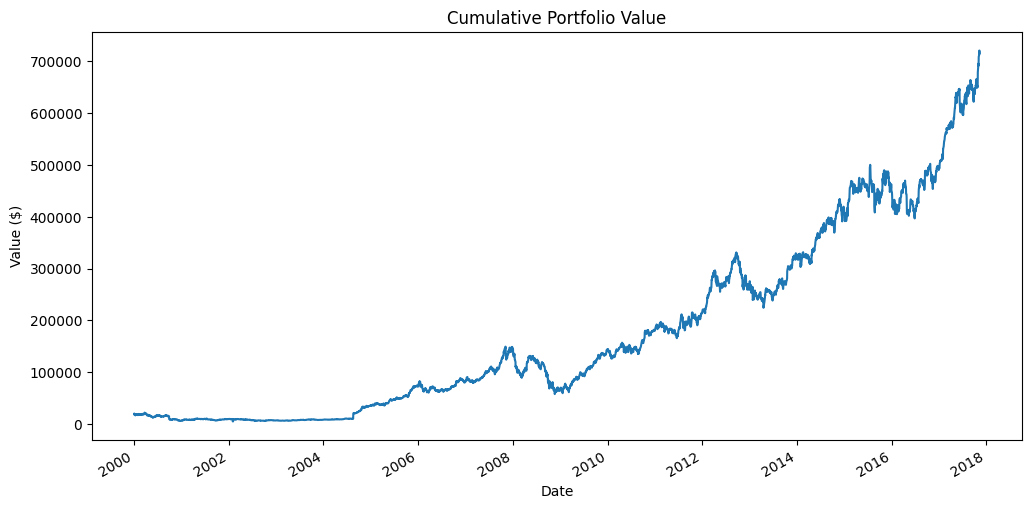

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 各資産のデータフレームを格納するための空のリストを初期化
dfs = []
# 資産とそれぞれのポートフォリオの重みを定義
assets = ['AAPL', 'MSFT', 'GOOGL']
portfolio = [1/3, 1/3, 1/3]
# 初期投資額を定義
investment = 10000
# ファイルからデータを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')
# 資産名を対応するデータファイルにマッピングする辞書
file_mapping = {
    'AAPL': './dataset/aapl.us.txt',
    'MSFT': './dataset/msft.us.txt',
    'GOOGL': './dataset/googl.us.txt'
}
# データフレームを格納するリスト
dfs = []
# 各資産とそれに対応するポートフォリオの重みをループで処理
for asset, p in zip(assets, portfolio):
    # 資産の履歴データをそれぞれのファイルから読み込む
    data = read_data(file_mapping[asset])
    # 2000年以降のデータにフィルタリング
    data = data[data.index >= '2000-01-01']
    # 終値でデータフレームを作成
    data = pd.DataFrame(data['Close'])
    # 標準化リターンを計算（初期の終値に対するリターン）
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    # アロケーションを計算（標準化リターンにポートフォリオの重みを乗算）
    data['Allocation'] = data['Norm return'] * p
    # ポジション値を計算（アロケーションに初期投資額を乗算）
    data['Position'] = data['Allocation'] * investment
    # データフレームをリストに追加
    dfs.append(data)
# すべてのデータフレームを結合
combined_df = pd.concat(dfs, axis=1)
# 'Position' 列を合計してポートフォリオ全体のポジションを取得
portfolio_value = combined_df[[col for col in combined_df.columns if 'Position' in col]].sum(axis=1)
# 累積ポートフォリオ価値をプロット
plt.figure(figsize=(12, 6))
portfolio_value.plot()
plt.title('Cumulative Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.show()

Normalized returns and position for AAPL:
            Norm return  Allocation       Position
Date                                              
2017-11-06    48.455334   16.151778  161517.781561
2017-11-07    48.608824   16.202941  162029.414227
2017-11-08    49.007898   16.335966  163359.659160
2017-11-09    48.907432   16.302477  163024.772323
2017-11-10    48.745570   16.248523  162485.232421

Normalized returns and position for MSFT:
            Norm return  Allocation     Position
Date                                            
2017-11-06     1.926428    0.642143  6421.425531
2017-11-07     1.921638    0.640546  6405.461291
2017-11-08     1.928480    0.642827  6428.267348
2017-11-09     1.917761    0.639254  6392.537858
2017-11-10     1.912744    0.637581  6375.813416

Normalized returns and position for GOOGL:
            Norm return  Allocation      Position
Date                                             
2017-11-06    20.782938    6.927646  69276.460036
2017-11-07    20.9764

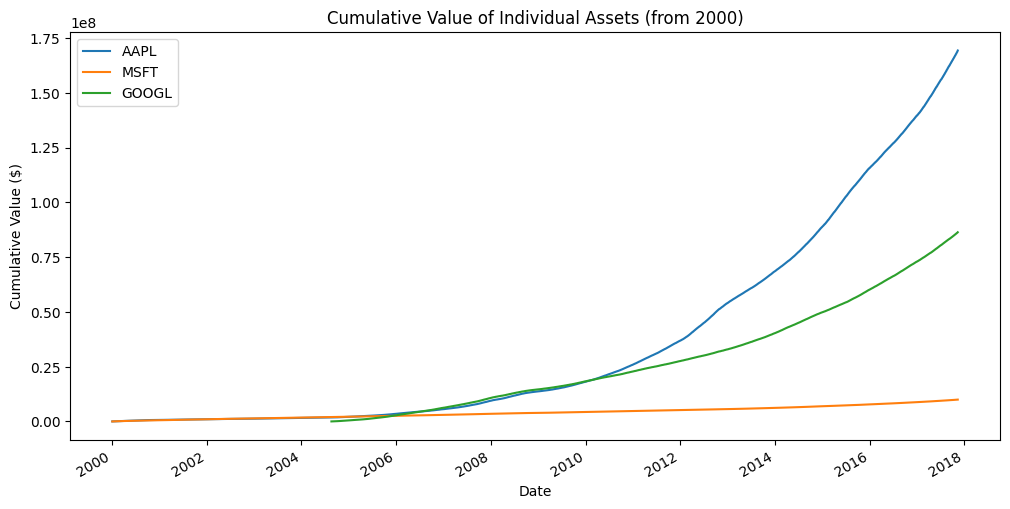

In [116]:
# 各資産の標準化リターンとポジションの確認
for asset, p in zip(assets, portfolio):
    data = read_data(file_mapping[asset])
    # 2000年以降のデータにフィルタリング
    data = data[data.index >= '2000-01-01']
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    data['Allocation'] = data['Norm return'] * p
    data['Position'] = data['Allocation'] * investment
    print(f"Normalized returns and position for {asset}:")
    print(data[['Norm return', 'Allocation', 'Position']].tail())
    print()
# 各資産の累積価値をプロットして確認
plt.figure(figsize=(12, 6))
for asset, p in zip(assets, portfolio):
    data = read_data(file_mapping[asset])
    # 2000年以降のデータにフィルタリング
    data = data[data.index >= '2000-01-01']
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    data['Allocation'] = data['Norm return'] * p
    data['Position'] = data['Allocation'] * investment
    cumulative_value = data['Position'].cumsum()
    cumulative_value.plot(label=asset)
plt.title('Cumulative Value of Individual Assets (from 2000)')
plt.xlabel('Date')
plt.ylabel('Cumulative Value ($)')
plt.legend()
plt.show()

In [117]:
# Show the first 5 records of Tesla
dfs[0].head(5)

,Close,Norm return,Allocation,Position
Date,,,,
2000-01-03,3.5833,1.000000,0.333333,3333.333333
2000-01-04,3.2810,0.915636,0.305212,3052.121415
2000-01-05,3.3295,0.929171,0.309724,3097.238114
2000-01-06,3.0416,0.848827,0.282942,2829.421669
2000-01-07,3.1862,0.889180,0.296393,2963.934548


                   AAPL         MSFT  GOOGL
Date                                       
2000-01-03  3333.333333  3333.333333    NaN
2000-01-04  3052.121415  3221.203552    NaN
2000-01-05  3097.238114  3255.032537    NaN
2000-01-06  2829.421669  3146.171623    NaN
2000-01-07  2963.934548  3186.842425    NaN


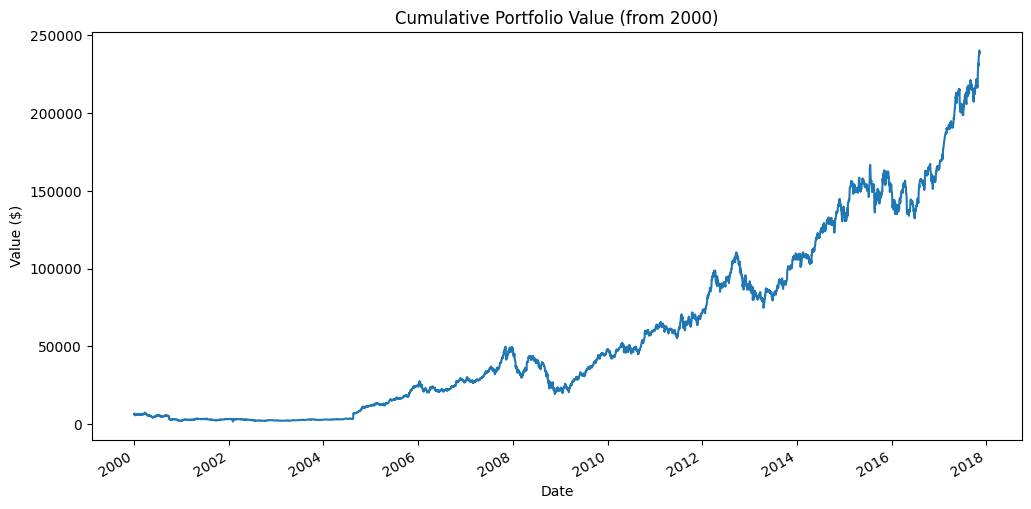

In [118]:
# 各資産のポジション値を格納するための空のリストを初期化
all_pos = []

# 各資産とそれに対応するポートフォリオの重みをループで処理
for asset, p in zip(assets, portfolio):
    # 資産の履歴データをそれぞれのファイルから読み込む
    data = read_data(file_mapping[asset])
    
    # 2000年以降のデータにフィルタリング
    data = data[data.index >= '2000-01-01']
    
    # 終値でデータフレームを作成
    data = pd.DataFrame(data['Close'])
    
    # 標準化リターンを計算（初期の終値に対するリターン）
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    
    # アロケーションを計算（標準化リターンにポートフォリオの重みを乗算）
    data['Allocation'] = data['Norm return'] * p
    
    # ポジション値を計算（アロケーションに初期投資額を乗算）
    data['Position'] = data['Allocation'] * investment
    
    # ポジション値のデータフレームをリストに追加
    all_pos.append(data['Position'])

# ポジション値を列方向（axis=1）に結合（3つの列）
portf_val = pd.concat(all_pos, axis=1)

# データフレームの列名を資産名に設定
portf_val.columns = assets

# 結合されたポジション値のデータフレームを表示
print(portf_val.head())

# 'Position' 列を合計してポートフォリオ全体のポジションを取得
portfolio_value = portf_val.sum(axis=1)

# 累積ポートフォリオ価値をプロット
plt.figure(figsize=(12, 6))
portfolio_value.plot()
plt.title('Cumulative Portfolio Value (from 2000)')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.show()

In [119]:
# 各資産のポジション値を結合する
# axis=0 行方向に結合, axis=1 列方向に結合（3つの列）
portf_val = pd.concat(all_pos, axis=1)
# データフレームの列名を資産名に設定
portf_val.columns = assets
# 新しい列 'Total' を追加し、これはすべての資産のポジション値の合計です
portf_val['Total'] = portf_val.sum(axis=1)
portf_val

,AAPL,MSFT,GOOGL,Total
Date,,,,
2000-01-03,3333.333333,3333.333333,NaN,6666.666667
2000-01-04,3052.121415,3221.203552,NaN,6273.324967
2000-01-05,3097.238114,3255.032537,NaN,6352.270650
2000-01-06,2829.421669,3146.171623,NaN,5975.593292
2000-01-07,2963.934548,3186.842425,NaN,6150.776974
...,...,...,...,...
2017-11-06,161517.781561,6421.425531,69276.460036,237215.667127
2017-11-07,162029.414227,6405.461291,69921.599894,238356.475411
2017-11-08,163359.659160,6428.267348,70313.600425,240101.526933


<Axes: xlabel='Date'>

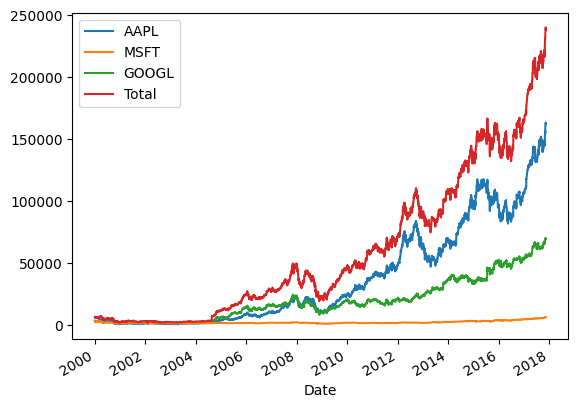

In [120]:
# Plot the total portfolio value over time
portf_val.plot()

In [121]:
# ポートフォリオの累積リターンを計算
cumulative_return = 100 * (portf_val['Total'][-1] / portf_val['Total'][0] - 1)
# Print the cumulative return
print(f'\nThe cumulative return is: {cumulative_return:.2f}%\n\n')


The cumulative return is: 3473.53%




C:\Users\takah\AppData\Local\Temp\ipykernel_24768\2110237401.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



C:\Users\takah\AppData\Local\Temp\ipykernel_24768\85983247.py:5: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



<Axes: xlabel='Date'>

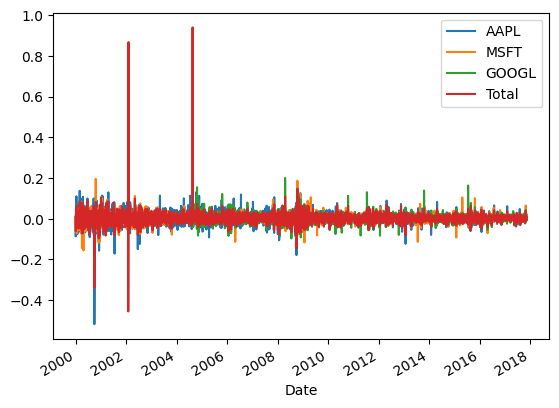

In [122]:
# ポートフォリオ価値のデータフレームをコピー
portf_val_growth = portf_val.copy()
# データフレームの各列の1日ごとのパーセンテージ変化を計算
for column in portf_val_growth.columns:
    portf_val_growth[column] = portf_val_growth[column].pct_change(1)
# 時間経過に伴うポートフォリオ価値の成長をプロット
portf_val_growth.plot()

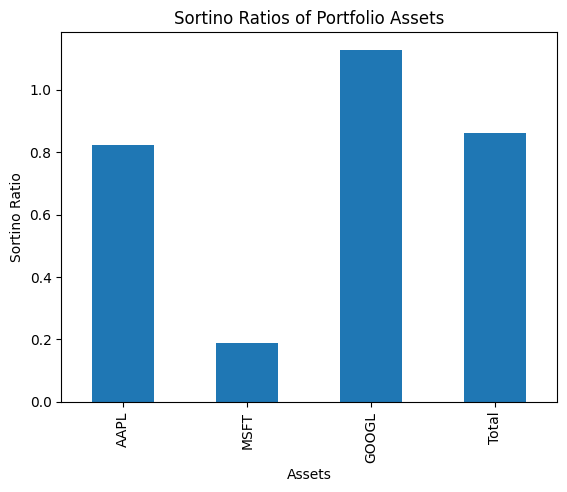

In [123]:
# 年間の取引日数を定義
N = 255
# リスクフリーレートを定義
rf = 0.042  # 4.2%
# シャープレシオを計算する関数を定義
def sharpe_ratio(return_series, N, rf):
    mean = (return_series.mean() * N) - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma
# シャープレシオ関数を portf_val_growth データフレームの各列に適用
sharpes = portf_val_growth.apply(sharpe_ratio, args=(N, rf), axis=0)
# ソルティノレシオを計算する関数を定義
def sortino_ratio(series, N, rf):
    mean = series.mean() * N - rf
    std_neg = series[series < 0].std() * np.sqrt(N)
    return mean / std_neg
# ソルティノレシオ関数を portf_val_growth データフレームの各列に適用
sortinos = portf_val_growth.apply(sortino_ratio, args=(N, rf), axis=0)
# ポートフォリオ資産のソルティノレシオをプロット
sortinos.plot.bar(title="Sortino Ratios of Portfolio Assets")
plt.xlabel('Assets')
plt.ylabel('Sortino Ratio')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Confusion Matrix: 
[[202 136]
 [143 179]]

Report: 
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.59       338
         1.0       0.57      0.56      0.56       322

    accuracy                           0.58       660
   macro avg       0.58      0.58      0.58       660
weighted avg       0.58      0.58      0.58       660



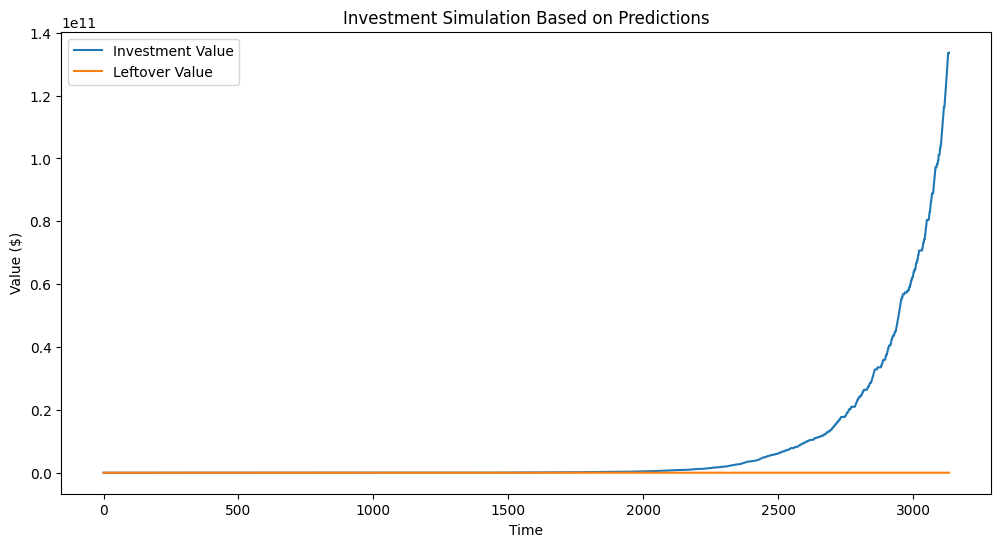

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
# from investment_module import Model_invest


def Model_invest(predictions, initial_investment):
    investment_value = initial_investment
    results = []
    for prediction in predictions:
        if prediction == 1:  # 株価上昇予測
            # 投資ロジックを実装（例：全額投資）
            investment_value *= 1.01  # 仮に1%の利益と仮定
        else:  # 株価下落予測
            # 投資を控えるロジックを実装
            pass
        results.append((investment_value, initial_investment))
    return results
# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Open', 'High', 'Low', 'Close'], parse_dates=['Date'], index_col='Date')

# 複数のファイルを読み込み
assets = ['AAPL', 'MSFT', 'GOOGL']
file_mapping = {
    'AAPL': './dataset/aapl.us.txt',
    'MSFT': './dataset/msft.us.txt',
    'GOOGL': './dataset/googl.us.txt'
}

# 資産データの読み込みと技術指標の計算
data_frames = {}
for asset in assets:
    df = read_data(file_mapping[asset])
    df['Norm return'] = df['Close'] / df['Close'].iloc[0]
    df['Growth rate'] = df['Close'].pct_change()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['BB_upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()
    df['Action'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(inplace=True)
    data_frames[asset] = df

# データフレームの結合
combined_df = pd.concat(data_frames, axis=1)

# 特徴量の選択
features = []
for asset in assets:
    asset_features = [(asset, 'Open'), (asset, 'High'), (asset, 'Low'), (asset, 'Close'), (asset, 'Norm return'), 
                      (asset, 'SMA_50'), (asset, 'SMA_200'), (asset, 'MACD'), (asset, 'Signal_Line'), (asset, 'RSI'), 
                      (asset, 'BB_upper'), (asset, 'BB_lower')]
    features.extend(asset_features)

# 特徴量と目的変数の定義
X = combined_df[features]
Y = combined_df[(assets[0], 'Action')]  # ここではAAPLのActionを目的変数として使用

# NaN値を削除
X = X.dropna()
Y = Y.loc[X.index]

# 特徴量の標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# クラスの不均衡を解消するためにSMOTEを使用
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# データを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# ランダムフォレスト分類器を初期化
rf_clf = RandomForestClassifier(random_state=42)

# ハイパーパラメータのグリッドサーチ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# 最適なモデルを使用して予測
best_rf_clf = grid_search.best_estimator_
Y_pred = best_rf_clf.predict(X_test)

# 混同行列と分類レポートを表示
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("\nReport: ")
print(class_report)

# 全データに対して予測を生成
predictions = best_rf_clf.predict(X_scaled)
predictions_binary = (predictions >= 0.5).astype(int)

# 投資シミュレーションを実行
investment_results = Model_invest(predictions_binary, 10000)

# 投資結果をプロット
investment_values, leftover_values = zip(*investment_results)
plt.figure(figsize=(12, 6))
plt.plot(investment_values, label='Investment Value')
plt.plot(leftover_values, label='Leftover Value')
plt.title('Investment Simulation Based on Predictions')
plt.xlabel('Time')
plt.ylabel('Value ($)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Open', 'High', 'Low', 'Close'], parse_dates=['Date'], index_col='Date')

# 複数のファイルを読み込み
assets = ['AAPL', 'MSFT', 'GOOGL']
file_mapping = {
    'AAPL': './dataset/aapl.us.txt',
    'MSFT': './dataset/msft.us.txt',
    'GOOGL': './dataset/googl.us.txt'
}

# 資産データの読み込みと技術指標の計算
data_frames = {}
for asset in assets:
    df = read_data(file_mapping[asset])
    df['Norm return'] = df['Close'] / df['Close'].iloc[0]
    df['Growth rate'] = df['Close'].pct_change()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = np.convolve(gain, np.ones(14) / 14, mode='valid')
    avg_loss = np.convolve(loss, np.ones(14) / 14, mode='valid')
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['BB_upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()
    df['Action'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(inplace=True)
    data_frames[asset] = df

# データフレームの結合
combined_df = pd.concat(data_frames, axis=1)

# 特徴量の選択
features = []
for asset in assets:
    asset_features = [(asset, 'Open'), (asset, 'High'), (asset, 'Low'), (asset, 'Close'), (asset, 'Norm return'), 
                      (asset, 'SMA_50'), (asset, 'SMA_200'), (asset, 'MACD'), (asset, 'Signal_Line'), (asset, 'RSI'), 
                      (asset, 'BB_upper'), (asset, 'BB_lower')]
    features.extend(asset_features)

# 特徴量と目的変数の定義
X = combined_df[features]
Y = combined_df[(assets[0], 'Action')]  # ここではAAPLのActionを目的変数として使用

# NaN値を削除
X = X.dropna()
Y = Y.loc[X.index]

# 特徴量の標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# クラスの不均衡を解消するためにSMOTEを使用
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# データを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# ランダムフォレスト分類器を初期化
rf_clf = RandomForestClassifier(random_state=42)

# ハイパーパラメータのグリッドサーチ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# 最適なモデルを使用して予測
best_rf_clf = grid_search.best_estimator_
Y_pred = best_rf_clf.predict(X_test)

# 混同行列と分類レポートを表示
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("\nReport: ")
print(class_report)

# 全データに対して予測を生成
predictions = best_rf_clf.predict(X_scaled)
predictions_binary = (predictions >= 0.5).astype(int)

# Closeのリターンを計算
returns = np.log(combined_df[(assets[0], 'Close')].values[1:] / combined_df[(assets[0], 'Close')].values[:-1])

# 投資シミュレーションを実行する関数
def Model_invest(predictions, investment):
    ivs = [investment]  # 投資額のリストを初期化
    left = [0]  # 余剰価値のリストを初期化

    # 予測をもとに投資シミュレーションを実行
    for i in range(1, len(predictions)):
        if predictions[i] == 1:  # 購入
            new_investment = ivs[-1] * (1 + returns[i-1])
            ivs.append(new_investment)
            left.append(left[-1])
        else:  # 保有または売却
            ivs.append(ivs[-1])
            left.append(left[-1])

    return list(zip(ivs, left))

# 投資シミュレーションを実行
investment_results = Model_invest(predictions_binary, 10000)

# 投資結果をプロット
investment_values, leftover_values = zip(*investment_results)
plt.figure(figsize=(12, 6))
plt.plot(investment_values, label='Investment Value')
plt.plot(leftover_values, label='Leftover Value')
plt.title('Investment Simulation Based on Predictions')
plt.xlabel('Time')
plt.ylabel('Value ($)')
plt.legend()
plt.show()


ValueError: Length of values (8351) does not match length of index (8364)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Open', 'High', 'Low', 'Close'], parse_dates=['Date'], index_col='Date')

# 複数のファイルを読み込み
assets = ['AAPL', 'MSFT', 'GOOGL']
file_mapping = {
    'AAPL': './dataset/aapl.us.txt',
    'MSFT': './dataset/msft.us.txt',
    'GOOGL': './dataset/googl.us.txt'
}

# 資産データの読み込みと技術指標の計算
data_frames = {}
for asset in assets:
    df = read_data(file_mapping[asset])
    df['Norm return'] = df['Close'] / df['Close'].iloc[0]
    df['Growth rate'] = df['Close'].pct_change()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['BB_upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()
    df['Action'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(inplace=True)
    data_frames[asset] = df

# データフレームの結合
combined_df = pd.concat(data_frames, axis=1)

# 特徴量の選択
features = []
for asset in assets:
    asset_features = [(asset, 'Open'), (asset, 'High'), (asset, 'Low'), (asset, 'Close'), (asset, 'Norm return'), 
                      (asset, 'SMA_50'), (asset, 'SMA_200'), (asset, 'MACD'), (asset, 'Signal_Line'), (asset, 'RSI'), 
                      (asset, 'BB_upper'), (asset, 'BB_lower')]
    features.extend(asset_features)

# 特徴量と目的変数の定義
X = combined_df[features]
Y = combined_df[(assets[0], 'Action')]  # ここではAAPLのActionを目的変数として使用

# NaN値を削除
X = X.dropna()
Y = Y.loc[X.index]

# 特徴量の標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# クラスの不均衡を解消するためにSMOTEを使用
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# データを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# XGBoost分類器を初期化
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# ハイパーパラメータのグリッドサーチ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# 最適なモデルを使用して予測
best_xgb_clf = grid_search.best_estimator_
Y_pred = best_xgb_clf.predict(X_test)

# 混同行列と分類レポートを表示
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("\nReport: ")
print(class_report)

# 全データに対して予測を生成
predictions = best_xgb_clf.predict(X_scaled)
predictions_binary = (predictions >= 0.5).astype(int)

# 投資シミュレーションを実行
investment_results = Model_invest(predictions_binary, 10000)

# 投資結果をプロット
investment_values, leftover_values = zip(*investment_results)
plt.figure(figsize=(12, 6))
plt.plot(investment_values, label='Investment Value')
plt.plot(leftover_values, label='Leftover Value')
plt.title('Investment Simulation Based on Predictions')
plt.xlabel('Time')
plt.ylabel('Value ($)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# データを読み込む関数
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# データの読み込み
data_aapl = read_data('./data/aapl.us.txt')
data_msft = read_data('./data/msft.us.txt')
data_googl = read_data('./data/googl.us.txt')

# データの結合
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']

# データの前処理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 訓練データとテストデータに分割
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# データセットを作成する関数
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step)]
        X.append(a)
        Y.append(dataset[i + time_step])
    return np.array(X), np.array(Y)

# データセットを作成
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# データをLSTMの入力形状に変換
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
# LSTMモデルの構築
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(3))  # 3つの株の予測を行うため、出力は3次元

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# モデルの訓練
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# 訓練データを用いた予測
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 予測データを元のスケールに戻す
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train_actual = scaler.inverse_transform(Y_train)
Y_test_actual = scaler.inverse_transform(Y_test)
# 投資戦略の実装
def investment_strategy(predictions, actual_prices, initial_investment, portfolio):
    investment = initial_investment
    shares = np.zeros(3)
    for i in range(1, len(predictions)):
        for j in range(3):
            if predictions[i][j] > actual_prices[i-1][j]:
                # 予測が上昇の場合、買い
                shares[j] = investment * portfolio[j] / actual_prices[i-1][j]
            elif predictions[i][j] < actual_prices[i-1][j]:
                # 予測が下落の場合、売り
                investment += shares[j] * actual_prices[i-1][j]
                shares[j] = 0
    # 最終的な資産価値
    final_value = investment + np.sum(shares * actual_prices[-1])
    return final_value

# 初期投資額を設定
initial_investment = 10000
portfolio = [0.45, 0.35, 0.20]  # ポートフォリオの割合

# テストデータに対して投資戦略を適用
final_investment_value = investment_strategy(test_predict, Y_test_actual, initial_investment, portfolio)

print(f"Initial Investment: ${initial_investment}")
print(f"Final Investment Value: ${final_investment_value}")

# 実際のデータと予測データをプロット
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data)[:, 0], label='AAPL Actual Stock Price')
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict[:, 0], label='AAPL Training Prediction')
plt.plot(data.index[train_size + time_step:train_size + time_step + len(test_predict)], test_predict[:, 0], label='AAPL Testing Prediction')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data)[:, 1], label='MSFT Actual Stock Price')
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict[:, 1], label='MSFT Training Prediction')
plt.plot(data.index[train_size + time_step:train_size + time_step + len(test_predict)], test_predict[:, 1], label='MSFT Testing Prediction')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data)[:, 2], label='GOOGL Actual Stock Price')
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict[:, 2], label='GOOGL Training Prediction')
plt.plot(data.index[train_size + time_step:train_size + time_step + len(test_predict)], test_predict[:, 2], label='GOOGL Testing Prediction')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow.python.tools'